<div><h2><b><center>MANOJ KUMAR - 2048015</b></h2></div>
<div><h3><b><center>P9: KNN Classifier</b></h3></div>

**Implement KNN classier and experiment with the following concepts**

**Check the performance of KNN with different distance measures**    
**Check the performance of KNN with binary, categorical & numerical data**

###### Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

###### Reading the dataset

In [2]:
ckd_df = pd.read_csv('kidney_disease.csv')

#Check the shape
print(ckd_df.shape)

(400, 26)


In [3]:
#check the columns
ckd_df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

###### Rename the columns to have meaningful names

In [4]:
col_dict={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"hemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

ckd_df.rename(columns=col_dict, inplace=True)

#Check the column names again
ckd_df.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'classification'],
      dtype='object')

###### Observing the data

In [5]:
ckd_df.head(11).T

0           1           2           3  \
id                                0           1           2           3   
age                              48           7          62          48   
blood_pressure                   80          50          80          70   
specific_gravity               1.02        1.02        1.01       1.005   
albumin                           1           4           2           4   
sugar                             0           0           3           0   
red_blood_cells                 NaN         NaN      normal      normal   
pus_cell                     normal      normal      normal    abnormal   
pus_cell_clumps          notpresent  notpresent  notpresent     present   
bacteria                 notpresent  notpresent  notpresent  notpresent   
blood_glucose_random            121         NaN         423         117   
blood_urea                       36          18          53          56   
serum_creatinine                1.2         0.8         1.8         3.8   
sodium                          NaN         NaN         NaN         111   
potassium                       NaN         NaN         NaN         2.5   
hemoglobin                     15.4        11.3         9.6        11.2   
packed_cell_volume               44          38          31          32   
white_blood_cell_count         7800        6000        7500        6700   
red_blood_cell_count            5.2         NaN         NaN         3.9   
hypertension                    yes          no          no         yes   
diabetes_mellitus               yes          no         yes          no   
coronary_artery_disease          no          no          no          no   
appetite                       good        good        poor        poor   
pedal_edema                      no          no          no         yes   
anemia                           no          no         yes         yes   
classification                  ckd         ckd         ckd         ckd   

                                  4           5           6           7  \
id                                4           5           6           7   
age                              51          60          68          24   
blood_pressure                   80          90          70         NaN   
specific_gravity               1.01       1.015        1.01       1.015   
albumin                           2           3           0           2   
sugar                             0           0           0           4   
red_blood_cells              normal         NaN         NaN      normal   
pus_cell                     normal         NaN      normal    abnormal   
pus_cell_clumps          notpresent  notpresent  notpresent  notpresent   
bacteria                 notpresent  notpresent  notpresent  notpresent   
blood_glucose_random            106          74         100         410   
blood_urea                       26          25          54          31   
serum_creatinine                1.4         1.1          24         1.1   
sodium                          NaN         142         104         NaN   
potassium                       NaN         3.2           4         NaN   
hemoglobin                     11.6        12.2        12.4        12.4   
packed_cell_volume               35          39          36          44   
white_blood_cell_count         7300        7800         NaN        6900   
red_blood_cell_count            4.6         4.4         NaN           5   
hypertension                     no         yes          no          no   
diabetes_mellitus                no         yes          no         yes   
coronary_artery_disease          no          no          no          no   
appetite                       good        good        good        good   
pedal_edema                      no         yes          no         yes   
anemia                           no          no          no          no   
classification                  ckd         ckd         ck

##### Data DeepDive

In [6]:
for i in ckd_df.drop("id",axis=1).columns:
    print('unique values in "{}":\n'.format(i),ckd_df[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "blood_pressure":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "specific_gravity":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "albumin":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "sugar":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "red_blood_cells":
 [nan 'normal' 'abnormal']
unique values in "pus_cell":
 ['normal' 'abnormal' nan]
unique values in "pus_cell_clumps":
 ['notpresent' 'present' nan]
unique values in "bacteria":
 ['notpresent' 'present' nan]
unique values in "blood_glucose_random":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114

In [7]:
#Replace incorrect values
ckd_df['diabetes_mellitus'] =ckd_df['diabetes_mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
ckd_df['coronary_artery_disease'] = ckd_df['coronary_artery_disease'].replace(to_replace='\tno',value='no')
ckd_df['white_blood_cell_count'] = ckd_df['white_blood_cell_count'].replace(to_replace='\t8400',value='8400')
ckd_df["classification"]=ckd_df["classification"].replace("ckd\t", "ckd")

for i in range(ckd_df.shape[0]):
    if ckd_df.iloc[i,16]=='\t?':
        ckd_df.iloc[i,16]=np.nan
    if ckd_df.iloc[i,16]=='\t43':
        ckd_df.iloc[i,16]='43'
    if ckd_df.iloc[i,17]=='\t?':
        ckd_df.iloc[i,17]=np.nan
    if ckd_df.iloc[i,17]=='\t6200':
        ckd_df.iloc[i,17]= '6200'
    if ckd_df.iloc[i,18]=='\t?':
        ckd_df.iloc[i,18]=np.nan
    if ckd_df.iloc[i,25]=='ckd':
        ckd_df.iloc[i,25]='1'
    if ckd_df.iloc[i,25]=='notckd':
        ckd_df.iloc[i,25]='0'

for i in ckd_df.drop("id",axis=1).columns:
    print('unique values in "{}":\n'.format(i),ckd_df[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "blood_pressure":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "specific_gravity":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "albumin":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "sugar":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "red_blood_cells":
 [nan 'normal' 'abnormal']
unique values in "pus_cell":
 ['normal' 'abnormal' nan]
unique values in "pus_cell_clumps":
 ['notpresent' 'present' nan]
unique values in "bacteria":
 ['notpresent' 'present' nan]
unique values in "blood_glucose_random":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114

In [8]:
# Observing the summarized information of data
ckd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [9]:
ckd_df.iloc[:,-1]=ckd_df.iloc[:,-1].astype('int64')
ckd_df.head(11).T

0           1           2           3  \
id                                0           1           2           3   
age                              48           7          62          48   
blood_pressure                   80          50          80          70   
specific_gravity               1.02        1.02        1.01       1.005   
albumin                           1           4           2           4   
sugar                             0           0           3           0   
red_blood_cells                 NaN         NaN      normal      normal   
pus_cell                     normal      normal      normal    abnormal   
pus_cell_clumps          notpresent  notpresent  notpresent     present   
bacteria                 notpresent  notpresent  notpresent  notpresent   
blood_glucose_random            121         NaN         423         117   
blood_urea                       36          18          53          56   
serum_creatinine                1.2         0.8         1.8         3.8   
sodium                          NaN         NaN         NaN         111   
potassium                       NaN         NaN         NaN         2.5   
hemoglobin                     15.4        11.3         9.6        11.2   
packed_cell_volume               44          38          31          32   
white_blood_cell_count         7800        6000        7500        6700   
red_blood_cell_count            5.2         NaN         NaN         3.9   
hypertension                    yes          no          no         yes   
diabetes_mellitus               yes          no         yes          no   
coronary_artery_disease          no          no          no          no   
appetite                       good        good        poor        poor   
pedal_edema                      no          no          no         yes   
anemia                           no          no         yes         yes   
classification                    1           1           1           1   

                                  4           5           6           7  \
id                                4           5           6           7   
age                              51          60          68          24   
blood_pressure                   80          90          70         NaN   
specific_gravity               1.01       1.015        1.01       1.015   
albumin                           2           3           0           2   
sugar                             0           0           0           4   
red_blood_cells              normal         NaN         NaN      normal   
pus_cell                     normal         NaN      normal    abnormal   
pus_cell_clumps          notpresent  notpresent  notpresent  notpresent   
bacteria                 notpresent  notpresent  notpresent  notpresent   
blood_glucose_random            106          74         100         410   
blood_urea                       26          25          54          31   
serum_creatinine                1.4         1.1          24         1.1   
sodium                          NaN         142         104         NaN   
potassium                       NaN         3.2           4         NaN   
hemoglobin                     11.6        12.2        12.4        12.4   
packed_cell_volume               35          39          36          44   
white_blood_cell_count         7300        7800         NaN        6900   
red_blood_cell_count            4.6         4.4         NaN           5   
hypertension                     no         yes          no          no   
diabetes_mellitus                no         yes          no         yes   
coronary_artery_disease          no          no          no          no   
appetite                       good        good        good        good   
pedal_edema                      no         yes          no         yes   
anemia                           no          no          no          no   
classification                    1           1           

In [10]:
print(ckd_df['packed_cell_volume'].unique())
print(ckd_df['white_blood_cell_count'].unique())
print(ckd_df['red_blood_cell_count'].unique())

['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '52' '14' '22' '18' '42' '17' '46' '23' '19'
 '25' '41' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54']
['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '7100' '11800' '9400' '5500' '5800' '13200'
 '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800' '6500'
 '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300' '12400'
 '10500' '4200' '4700' '10900' '8100' '9500' '2200' '12800' '11200'
 '19100' '12300' '16700' '2600' '26400' '8800' '7400' '4900' '8000'
 '12000' '15700' '4100' '5700' '11500' '5400' '10800' '9900' '5200' '5900'
 '9300' '9700' '5100' '6600']
['5.2' nan '3.9' '4.6' '4.4' '5' '4.0' '3.7' '3.8' '3.4' '2.6' '2.8' '4.3'
 '3.2' '3.6' '4' '4.1' '4.9' '2.5' '

In [11]:
mistyped=['packed_cell_volume','white_blood_cell_count','red_blood_cell_count']
for col in mistyped:
        ckd_df[col]=ckd_df[col].astype('float')
                
numeric=[]
for i in ckd_df.columns:
    if ckd_df[i].dtype=='float64':
        numeric.append(i)

numeric 

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'hemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [12]:
ckd_df.drop('id',axis=1,inplace=True)

categoricals=[]

for col in ckd_df.columns:
    if not col in numeric:
        categoricals.append(col)
categoricals.remove('classification')

categoricals

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia']

In [13]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.style as style
style.use('fivethirtyeight')

##### Checking distribution of the numerical features

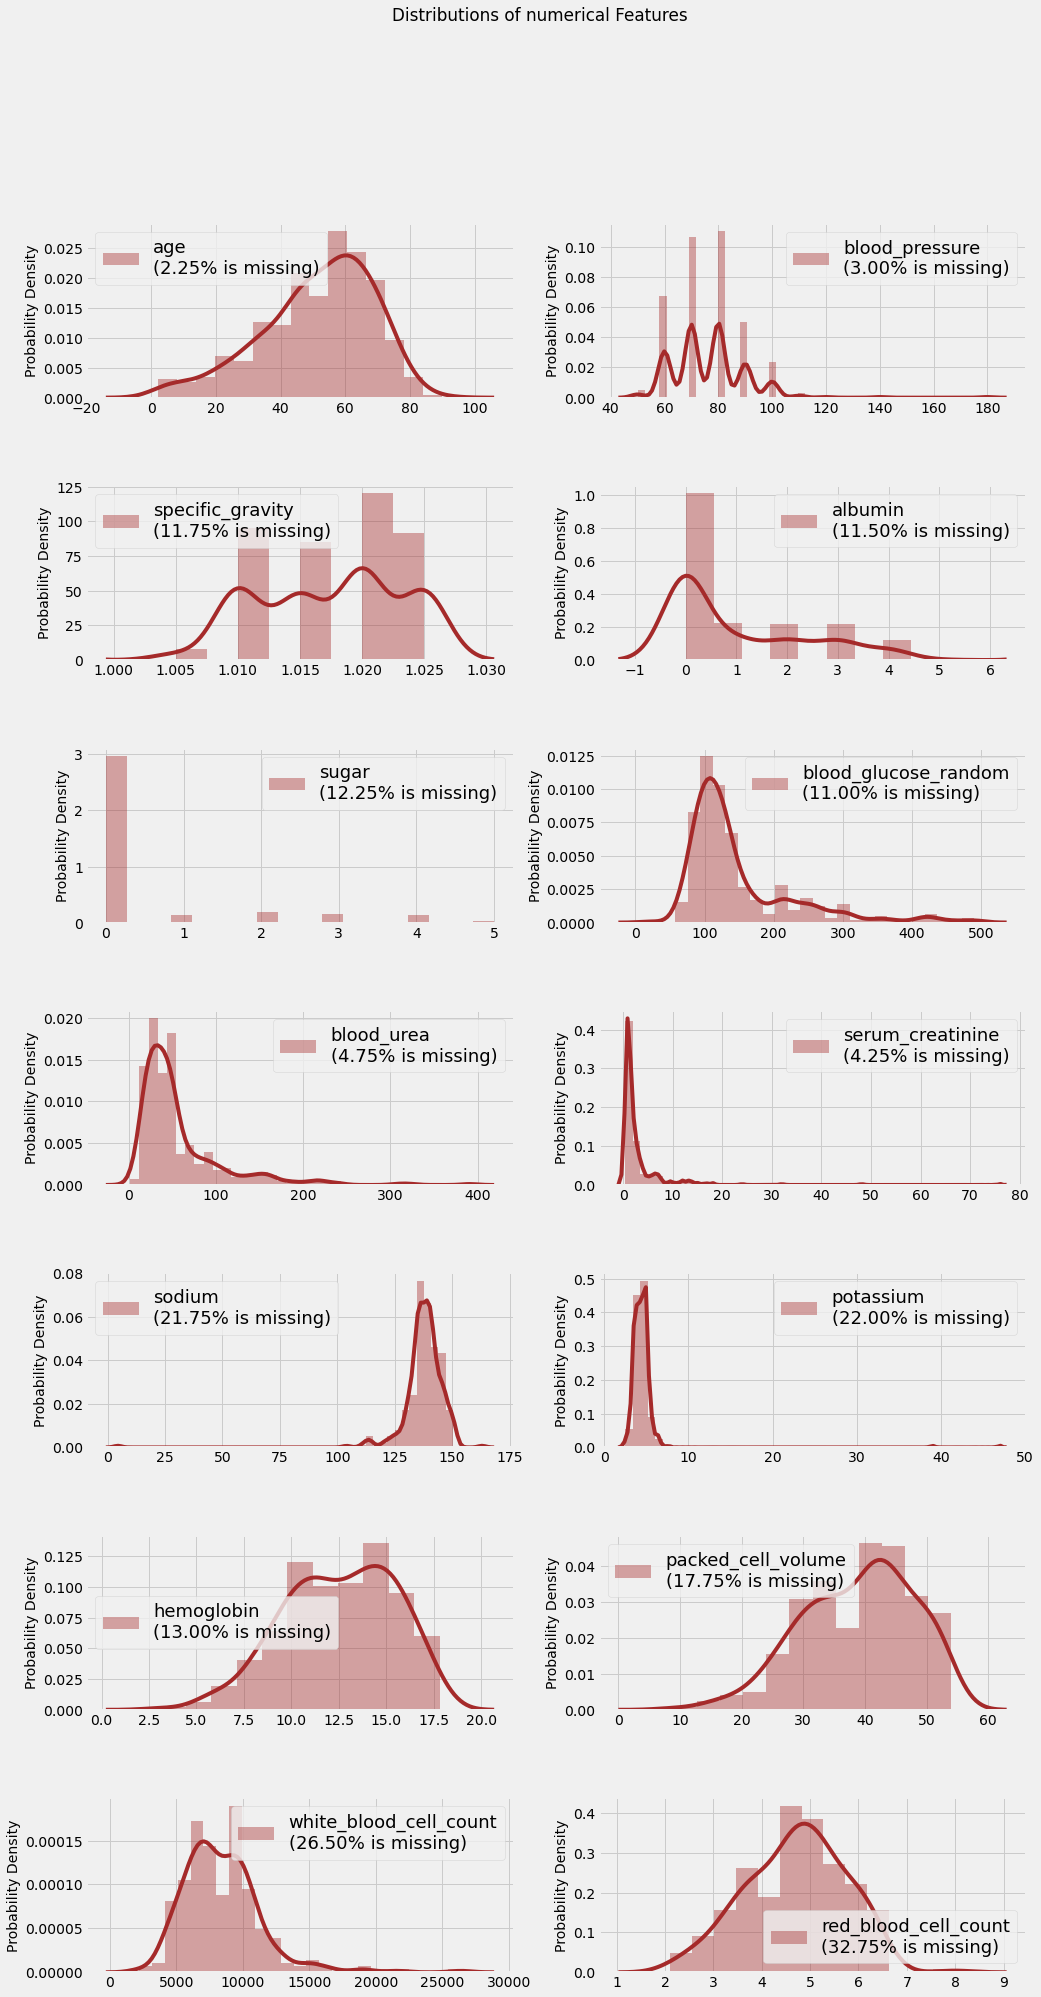

In [14]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15,30))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of numerical Features')

n_rows, n_cols = (7,2)

for index, column in enumerate(numeric):
    
    i,j = (index // n_cols), (index % n_cols)
    miss_perc="%.2f"%(100*(1-(ckd_df[column].dropna().shape[0])/ckd_df.shape[0]))
    collabel=column+"\n({}% is missing)".format(miss_perc)
    fig=sns.distplot(ckd_df[column], color="brown", label=collabel, 
                     norm_hist=True, ax=axes[i,j], kde_kws={"lw":4})
    fig=fig.legend(loc='best', fontsize=18)
    
    axes[i,j].set_ylabel("Probability Density",fontsize='medium')
    axes[i,j].set_xlabel(None)

plt.show()

##### Checking distribution of the Categorical features

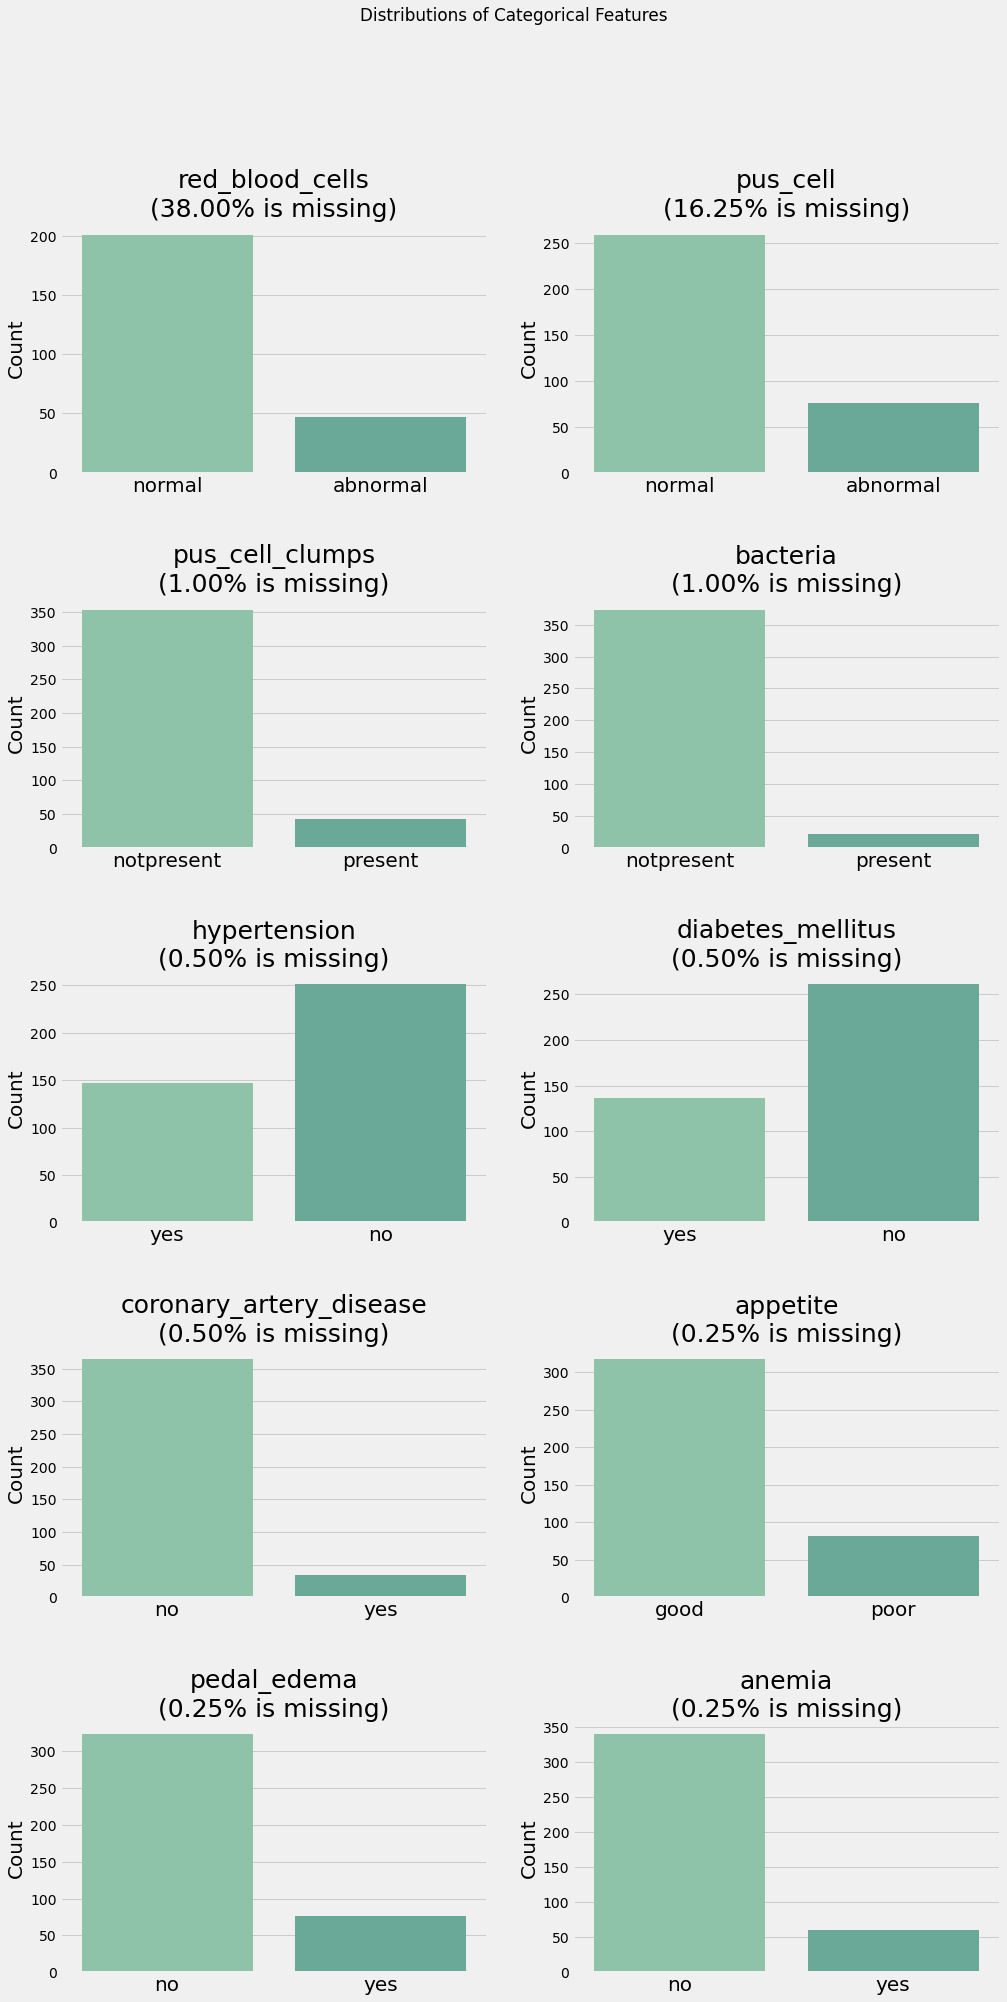

In [15]:
style.use('fivethirtyeight')

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,30))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of Categorical Features')

n_rows, n_cols = (5,2)

for index, column in enumerate(categoricals):
    
    i,j = index // n_cols, index % n_cols
    miss_perc="%.2f"%(100*(1-(ckd_df[column].dropna().shape[0])/ckd_df.shape[0]))
    collabel=column+"\n({}% is missing)".format(miss_perc)
    fig = sns.countplot(x=column, data=ckd_df,label=collabel, 
                        palette=sns.cubehelix_palette(rot=-.4,light=0.7,hue=1), ax=axes[i,j])
    
    axes[i,j].set_title(collabel,fontsize=25)
    axes[i,j].set_xlabel(None)
    axes[i,j].set_ylabel("Count",fontsize=20)
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), Fontsize=20)

plt.show()

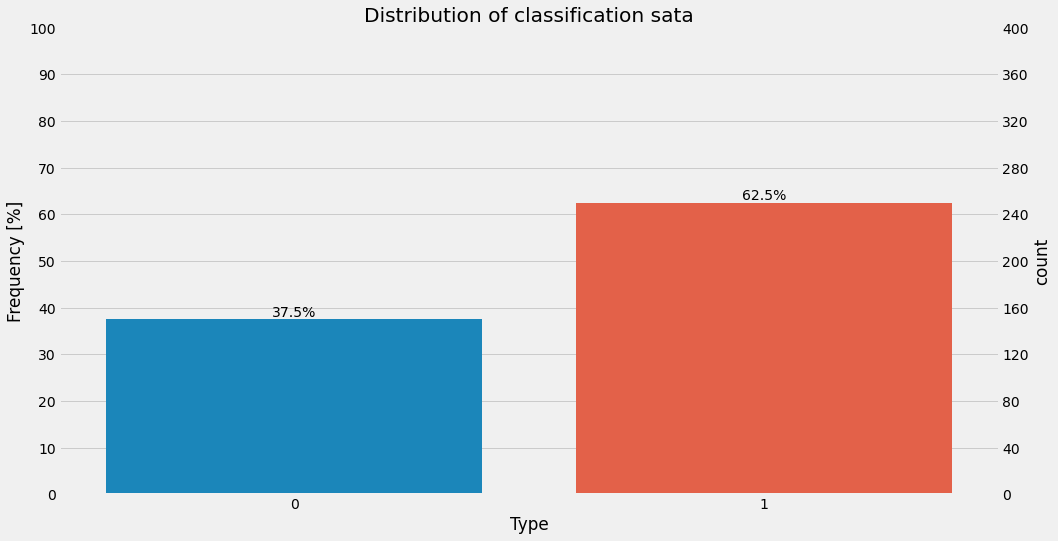

In [16]:
import matplotlib.ticker as ticker
style.use('fivethirtyeight')
# Some random data
ncount = 400

plt.figure(figsize=(15,8))
ax = sns.countplot(x="classification", data=ckd_df)
plt.title('Distribution of classification sata')
plt.xlabel('Type')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

In [17]:
for i in range(ckd_df.shape[0]):
    if ckd_df.iloc[i,24]=='ckd':
        ckd_df.iloc[i,24]='1'
    if ckd_df.iloc[i,24]=='notckd':
        ckd_df.iloc[i,24]='0'

##### Missing Values

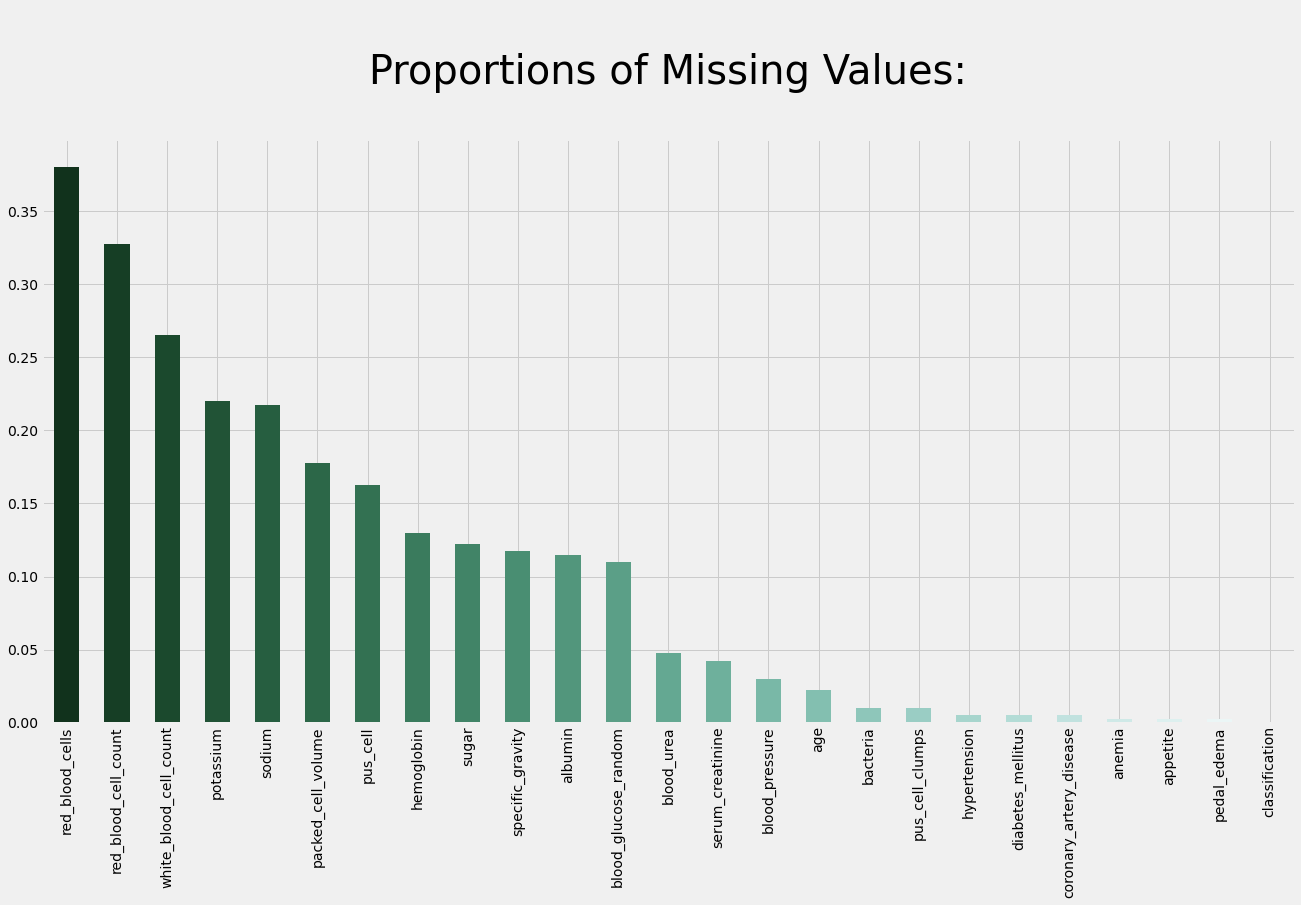

In [18]:
style.use('fivethirtyeight')

d=((ckd_df.isnull().sum()/ckd_df.shape[0])).sort_values(ascending=False)
d.plot(kind='bar',
       color=sns.cubehelix_palette(start=2,
                                    rot=0.15,
                                    dark=0.15,
                                    light=0.95,
                                    reverse=True,
                                    n_colors=24),
        figsize=(20,10))
plt.title("\nProportions of Missing Values:\n",fontsize=40)
plt.show()

In [19]:
ckd_df.head(10).T

0           1           2           3  \
age                              48           7          62          48   
blood_pressure                   80          50          80          70   
specific_gravity               1.02        1.02        1.01       1.005   
albumin                           1           4           2           4   
sugar                             0           0           3           0   
red_blood_cells                 NaN         NaN      normal      normal   
pus_cell                     normal      normal      normal    abnormal   
pus_cell_clumps          notpresent  notpresent  notpresent     present   
bacteria                 notpresent  notpresent  notpresent  notpresent   
blood_glucose_random            121         NaN         423         117   
blood_urea                       36          18          53          56   
serum_creatinine                1.2         0.8         1.8         3.8   
sodium                          NaN         NaN         NaN         111   
potassium                       NaN         NaN         NaN         2.5   
hemoglobin                     15.4        11.3         9.6        11.2   
packed_cell_volume               44          38          31          32   
white_blood_cell_count         7800        6000        7500        6700   
red_blood_cell_count            5.2         NaN         NaN         3.9   
hypertension                    yes          no          no         yes   
diabetes_mellitus               yes          no         yes          no   
coronary_artery_disease          no          no          no          no   
appetite                       good        good        poor        poor   
pedal_edema                      no          no          no         yes   
anemia                           no          no         yes         yes   
classification                    1           1           1           1   

                                  4           5           6           7  \
age                              51          60          68          24   
blood_pressure                   80          90          70         NaN   
specific_gravity               1.01       1.015        1.01       1.015   
albumin                           2           3           0           2   
sugar                             0           0           0           4   
red_blood_cells              normal         NaN         NaN      normal   
pus_cell                     normal         NaN      normal    abnormal   
pus_cell_clumps          notpresent  notpresent  notpresent  notpresent   
bacteria                 notpresent  notpresent  notpresent  notpresent   
blood_glucose_random            106          74         100         410   
blood_urea                       26          25          54          31   
serum_creatinine                1.4         1.1          24         1.1   
sodium                          NaN         142         104         NaN   
potassium                       NaN         3.2           4         NaN   
hemoglobin                     11.6        12.2        12.4        12.4   
packed_cell_volume               35          39          36          44   
white_blood_cell_count         7300        7800         NaN        6900   
red_blood_cell_count            4.6         4.4         NaN           5   
hypertension                     no         yes          no          no   
diabetes_mellitus                no         yes          no         yes   
coronary_artery_disease          no          no          no          no   
appetite                       good        good        good        good   
pedal_edema                      no         yes          no         yes   
anemia                           no          no          no          no   
classification                    1           1           1           1   

                                  8           9  
age                              52          53  
blood_pressure                  

##### One-Hot Encoding

In [20]:
onehotdata=pd.get_dummies(ckd_df,drop_first=True,prefix_sep=': ')
onehotdata.head(13).T

0        1        2         3        4  \
age                             48.00     7.00    62.00    48.000    51.00   
blood_pressure                  80.00    50.00    80.00    70.000    80.00   
specific_gravity                 1.02     1.02     1.01     1.005     1.01   
albumin                          1.00     4.00     2.00     4.000     2.00   
sugar                            0.00     0.00     3.00     0.000     0.00   
blood_glucose_random           121.00      NaN   423.00   117.000   106.00   
blood_urea                      36.00    18.00    53.00    56.000    26.00   
serum_creatinine                 1.20     0.80     1.80     3.800     1.40   
sodium                            NaN      NaN      NaN   111.000      NaN   
potassium                         NaN      NaN      NaN     2.500      NaN   
hemoglobin                      15.40    11.30     9.60    11.200    11.60   
packed_cell_volume              44.00    38.00    31.00    32.000    35.00   
white_blood_cell_count        7800.00  6000.00  7500.00  6700.000  7300.00   
red_blood_cell_count             5.20      NaN      NaN     3.900     4.60   
classification                   1.00     1.00     1.00     1.000     1.00   
red_blood_cells: normal          0.00     0.00     1.00     1.000     1.00   
pus_cell: normal                 1.00     1.00     1.00     0.000     1.00   
pus_cell_clumps: present         0.00     0.00     0.00     1.000     0.00   
bacteria: present                0.00     0.00     0.00     0.000     0.00   
hypertension: yes                1.00     0.00     0.00     1.000     0.00   
diabetes_mellitus: yes           1.00     0.00     1.00     0.000     0.00   
coronary_artery_disease: yes     0.00     0.00     0.00     0.000     0.00   
appetite: poor                   0.00     0.00     1.00     1.000     0.00   
pedal_edema: yes                 0.00     0.00     0.00     1.000     0.00   
anemia: yes                      0.00     0.00     1.00     1.000     0.00   

                                     5       6         7         8         9  \
age                             60.000   68.00    24.000    52.000     53.00   
blood_pressure                  90.000   70.00       NaN   100.000     90.00   
specific_gravity                 1.015    1.01     1.015     1.015      1.02   
albumin                          3.000    0.00     2.000     3.000      2.00   
sugar                            0.000    0.00     4.000     0.000      0.00   
blood_glucose_random            74.000  100.00   410.000   138.000     70.00   
blood_urea                      25.000   54.00    31.000    60.000    107.00   
serum_creatinine                 1.100   24.00     1.100     1.900      7.20   
sodium                         142.000  104.00       NaN       NaN    114.00   
potassium                        3.200    4.00       NaN       NaN      3.70   
hemoglobin                      12.200   12.40    12.400    10.800      9.50   
packed_cell_volume              39.000   36.00    44.000    33.000     29.00   
white_blood_cell_count        7800.000     NaN  6900.000  9600.000  12100.00   
red_blood_cell_count             4.400     NaN     5.000     4.000      3.70   
classification                   1.000    1.00     1.000     1.000      1.00   
red_blood_cells: normal          0.000    0.00     1.000     1.000      0.00   
pus_cell: normal                 0.000    1.00     0.000     0.000      0.00   
pus_cell_clumps: present         0.000    0.00     0.000     1.000      1.00   
bacteria: present                0.000    0.00     0.000     0.000      0.00   
hypertension: yes                1.000    0.00     0.000     1.000      1.00   
diabetes_mellitus: yes           1.000    0.00     1.000     1.000      1.00   
coronary_artery_disease: yes     0.000    0.00     0.000     0.000      0.00   
appetite: poor                   0.000    0.00     0.000     0.000      1.00   
pedal_edema: yes                 1.000    0.00     1.000     0.000      0.00   
anemia:

In [21]:
# define imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

impute_columns=list(set(onehotdata.columns)-set(["classification"]))
print(impute_columns)

['diabetes_mellitus: yes', 'age', 'red_blood_cells: normal', 'hypertension: yes', 'coronary_artery_disease: yes', 'appetite: poor', 'white_blood_cell_count', 'albumin', 'pedal_edema: yes', 'specific_gravity', 'blood_pressure', 'pus_cell: normal', 'sugar', 'blood_urea', 'bacteria: present', 'serum_creatinine', 'sodium', 'red_blood_cell_count', 'hemoglobin', 'potassium', 'packed_cell_volume', 'pus_cell_clumps: present', 'blood_glucose_random', 'anemia: yes']


In [22]:
imputer.fit(onehotdata[impute_columns])     

KNNImputer()

In [23]:
X_trans=pd.DataFrame(imputer.transform(onehotdata[impute_columns]), columns=impute_columns)

In [24]:
X_trans.head(13).T

0        1        2         3        4  \
diabetes_mellitus: yes           1.00     0.00     1.00     0.000     0.00   
age                             48.00     7.00    62.00    48.000    51.00   
red_blood_cells: normal          0.00     0.00     1.00     1.000     1.00   
hypertension: yes                1.00     0.00     0.00     1.000     0.00   
coronary_artery_disease: yes     0.00     0.00     0.00     0.000     0.00   
appetite: poor                   0.00     0.00     1.00     1.000     0.00   
white_blood_cell_count        7800.00  6000.00  7500.00  6700.000  7300.00   
albumin                          1.00     4.00     2.00     4.000     2.00   
pedal_edema: yes                 0.00     0.00     0.00     1.000     0.00   
specific_gravity                 1.02     1.02     1.01     1.005     1.01   
blood_pressure                  80.00    50.00    80.00    70.000    80.00   
pus_cell: normal                 1.00     1.00     1.00     0.000     1.00   
sugar                            0.00     0.00     3.00     0.000     0.00   
blood_urea                      36.00    18.00    53.00    56.000    26.00   
bacteria: present                0.00     0.00     0.00     0.000     0.00   
serum_creatinine                 1.20     0.80     1.80     3.800     1.40   
sodium                         137.60   136.80   133.80   111.000   138.40   
red_blood_cell_count             5.20     4.96     3.80     3.900     4.60   
hemoglobin                      15.40    11.30     9.60    11.200    11.60   
potassium                        4.20     3.92     4.20     2.500     3.98   
packed_cell_volume              44.00    38.00    31.00    32.000    35.00   
pus_cell_clumps: present         0.00     0.00     0.00     1.000     0.00   
blood_glucose_random           121.00   113.00   423.00   117.000   106.00   
anemia: yes                      0.00     0.00     1.00     1.000     0.00   

                                     5         6         7         8  \
diabetes_mellitus: yes           1.000      0.00     1.000     1.000   
age                             60.000     68.00    24.000    52.000   
red_blood_cells: normal          0.000      0.00     1.000     1.000   
hypertension: yes                1.000      0.00     0.000     1.000   
coronary_artery_disease: yes     0.000      0.00     0.000     0.000   
appetite: poor                   0.000      0.00     0.000     0.000   
white_blood_cell_count        7800.000  10280.00  6900.000  9600.000   
albumin                          3.000      0.00     2.000     3.000   
pedal_edema: yes                 1.000      0.00     1.000     0.000   
specific_gravity                 1.015      1.01     1.015     1.015   
blood_pressure                  90.000     70.00    74.000   100.000   
pus_cell: normal                 0.000      1.00     0.000     0.000   
sugar                            0.000      0.00     4.000     0.000   
blood_urea                      25.000     54.00    31.000    60.000   
bacteria: present                0.000      0.00     0.000     0.000   
serum_creatinine                 1.100     24.00     1.100     1.900   
sodium                         142.000    104.00   133.800   134.000   
red_blood_cell_count             4.400      4.64     5.000     4.000   
hemoglobin                      12.200     12.40    12.400    10.800   
potassium                        3.200      4.00     4.200     4.960   
packed_cell_volume              39.000     36.00    44.000    33.000   
pus_cell_clumps: present         0.000      0.00     0.000     1.000   
blood_glucose_random            74.000    100.00   410.000   138.000   
anemia: yes                      0.000      0.00     0.000     1.000   

                                     9       10       11         12  
diabetes_mellitus: yes            1.00     1.00     1.00      1.000  
age                              53.00    50.00    63.00     68.000  
red_blood_cells: normal           0.00     0.00     0.00      0.000  
hype

In [25]:
X_trans # final datset

diabetes_mellitus: yes   age  red_blood_cells: normal  hypertension: yes  \
0                       1.0  48.0                      0.0                1.0   
1                       0.0   7.0                      0.0                0.0   
2                       1.0  62.0                      1.0                0.0   
3                       0.0  48.0                      1.0                1.0   
4                       0.0  51.0                      1.0                0.0   
..                      ...   ...                      ...                ...   
395                     0.0  55.0                      1.0                0.0   
396                     0.0  42.0                      1.0                0.0   
397                     0.0  12.0                      1.0                0.0   
398                     0.0  17.0                      1.0                0.0   
399                     0.0  58.0                      1.0                0.0   

     coronary_artery_disease: yes  appetite: poor  white_blood_cell_count  \
0                             0.0             0.0                  7800.0   
1                             0.0             0.0                  6000.0   
2                             0.0             1.0                  7500.0   
3                             0.0             1.0                  6700.0   
4                             0.0             0.0                  7300.0   
..                            ...             ...                     ...   
395                           0.0             0.0                  6700.0   
396                           0.0             0.0                  7800.0   
397                           0.0             0.0                  6600.0   
398                           0.0             0.0                  7200.0   
399                           0.0             0.0                  6800.0   

     albumin  pedal_edema: yes  specific_gravity  ...  bacteria: present  \
0        1.0               0.0             1.020  ...                0.0   
1        4.0               0.0             1.020  ...                0.0   
2        2.0               0.0             1.010  ...                0.0   
3        4.0               1.0             1.005  ...                0.0   
4        2.0               0.0             1.010  ...                0.0   
..       ...               ...               ...  ...                ...   
395      0.0               0.0             1.020  ...                0.0   
396      0.0               0.0             1.025  ...                0.0   
397      0.0               0.0             1.020  ...                0.0   
398      0.0               0.0             1.025  ...                0.0   
399      0.0               0.0             1.025  ...                0.0   

     serum_creatinine  sodium  red_blood_cell_count  hemoglobin  potassium  \
0                 1.2   137.6                  5.20        15.4       4.20   
1                 0.8   136.8                  4.96        11.3       3.92   
2                 1.8   133.8                  3.80         9.6       4.20   
3                 3.8   111.0                  3.90        11.2       2.50   
4                 1.4   138.4                  4.60        11.6       3.98   
..                ...     ...                   ...         ...        ...   
395               0.5   150.0                  4.90        15.7       4.90   
396               1.2   141.0                  6.20        16.5       3.50   
397               0.6   137.0                  5.40        15.8       4.40   
398               1.0   135.0                  5.90        14.2       4.90   
399               1.1   141.0                  6.10        15.8       3.50   

     packed_cell_volume  pus_cell_clumps: present  blood_glucose_random  \
0                  44.0                       0.0                 121.0   
1                  38.0                       0.0                 113.0   
2                  31.0         

##### Modelling

In [26]:
X=X_trans
y=ckd_df["classification"]

X_prod=X_trans
print(X.shape)
print(y.shape)
print(X_prod.shape)

(400, 24)
(400,)
(400, 24)


###### Predictive Models with hyperparameter tuning Section

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV 

In [28]:
def display_confusion_matrix(y_test,y_pred):
    
    cm = confusion_matrix(y_test, y_pred)
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")
    print(classification_report(y_test, y_pred))

In [29]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [30]:
##Split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4658)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 24)
(80, 24)
(320,)
(80,)


###### StandardScaler data with PCA implementation

In [31]:
# performing preprocessing part 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 

X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [32]:
# Applying PCA function on training and testing set of X component 
from sklearn.decomposition import PCA 

pca = PCA(n_components = 5) 

X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 

explained_variance = pca.explained_variance_ratio_ 
explained_variance

array([0.30943656, 0.07796664, 0.06483449, 0.05539114, 0.05159137])

##### k Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

model = KNeighborsClassifier(n_jobs=-1)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
prediction1=model.predict(X_train)

print("\033[1m Accuracy:\033[0m",round(metrics.accuracy_score(prediction1,y_train),3))

 Accuracy: 0.997


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        55

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



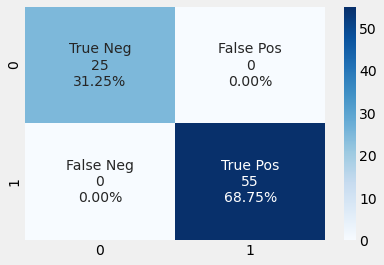

In [34]:
display_confusion_matrix(prediction,y_test)

## Hyper Parameters Tuning

### Minkowski

In [35]:
model = KNeighborsClassifier(n_jobs=-1)

#Hyper Parameters Set
params = {'n_neighbors':[3,5,7,9,11,13,15,17,19],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1],
          'metric':['minkowski'],
          'p':range(3,6)
         }


model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
model1.fit(X_train,y_train)

print("\033[1m * Parameters of KNN: \033[0m",model.get_params().keys())
print("\n \033[1m * Best Hyper Parameters: \033[0m",model1.best_params_)

 * Parameters of KNN:  dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

  * Best Hyper Parameters:  {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'n_jobs': -1, 'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}


In [36]:
# Train Dataset
predicted = model1.predict(X_train)
actual = y_train
print("\n \033[1m Accuracy:\033[0m",round(metrics.accuracy_score(actual,predicted),3))


  Accuracy: 0.997


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       125
           1       1.00      0.99      1.00       195

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



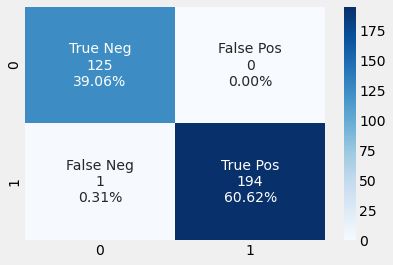

In [37]:
display_confusion_matrix(actual,predicted)

### Euclidean

In [38]:
#Hyper Parameters Set
params = {'n_neighbors':[3,5,7,9,11,13,15,17,19],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1],
          'metric':['euclidean'],
          'p':range(3,6)
         }

model2 = GridSearchCV(model, param_grid=params, n_jobs=1)
model2.fit(X_train,y_train)

print("\033[1m * Parameters of KNN: \033[0m",model.get_params().keys())
print("\n \033[1m * Best Hyper Parameters: \033[0m",model2.best_params_)

 * Parameters of KNN:  dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

  * Best Hyper Parameters:  {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}


In [39]:
# Train Dataset
predicted = model2.predict(X_train)
actual = y_train
print("\n \033[1m Accuracy:\033[0m",round(metrics.accuracy_score(actual,predicted),3))


  Accuracy: 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       195

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



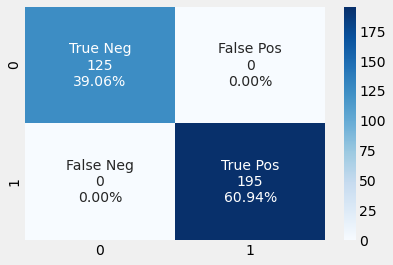

In [40]:
display_confusion_matrix(actual,predicted)

### Manhattan

In [41]:
#Hyper Parameters Set
params = {'n_neighbors':[3,5,7,9,11,13,15,17,19],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1],
          'metric':['manhattan'],
          'p':range(3,6)
         }

model3 = GridSearchCV(model, param_grid=params, n_jobs=1)
model3.fit(X_train,y_train)

print("\033[1m * Parameters of KNN: \033[0m",model.get_params().keys())
print("\n \033[1m * Best Hyper Parameters: \033[0m",model3.best_params_)

 * Parameters of KNN:  dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

  * Best Hyper Parameters:  {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'manhattan', 'n_jobs': -1, 'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}


In [42]:
# Train Dataset
predicted = model3.predict(X_train)
actual = y_train
print("\n \033[1m Accuracy:\033[0m",round(metrics.accuracy_score(actual,predicted),3))



  Accuracy: 0.997


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       125
           1       0.99      1.00      1.00       195

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



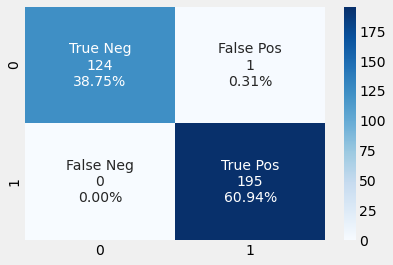

In [43]:
display_confusion_matrix(actual,predicted)

In [44]:
models = pd.DataFrame({
    'Model': ['Normal', 'Minkowski', 'Euclidean', 'Manhattan'],
    'Score': [0.997,0.997,1.0,0.997]})
models.sort_values(by='Score', ascending=False)

Model  Score
2  Euclidean  1.000
0     Normal  0.997
1  Minkowski  0.997
3  Manhattan  0.997

In [47]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.bar(models, x='Model', y='Score', color="Model", title="Model Comparison")
fig.show()

**Advantages of KNN**

1. No Training Period: KNN is called Lazy Learner (Instance based learning). It does not learn anything in the training period. It does not derive any discriminative function from the training data. In other words, there is no training period for it. It stores the training dataset and learns from it only at the time of making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g. SVM, Linear Regression etc.

2. Since the KNN algorithm requires no training before making predictions, new data can be added seamlessly which will not impact the accuracy of the algorithm.

3. KNN is very easy to implement. There are only two parameters required to implement KNN              
    i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)

**Disadvantages of KNN**

1. Does not work well with large dataset: In large datasets, the cost of calculating the distance between the new point and each existing points is huge which degrades the performance of the algorithm.

2. Does not work well with high dimensions: The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension.

3. Need feature scaling: We need to do feature scaling (standardization and normalization) before applying KNN algorithm to any dataset. If we don't do so, KNN may generate wrong predictions.

4. Sensitive to noisy data, missing values and outliers: KNN is sensitive to noise in the dataset. We need to manually impute missing values and remove outliers.